<a href="https://colab.research.google.com/github/shubham-bhadouria/Netflix-Movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_TV_show_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

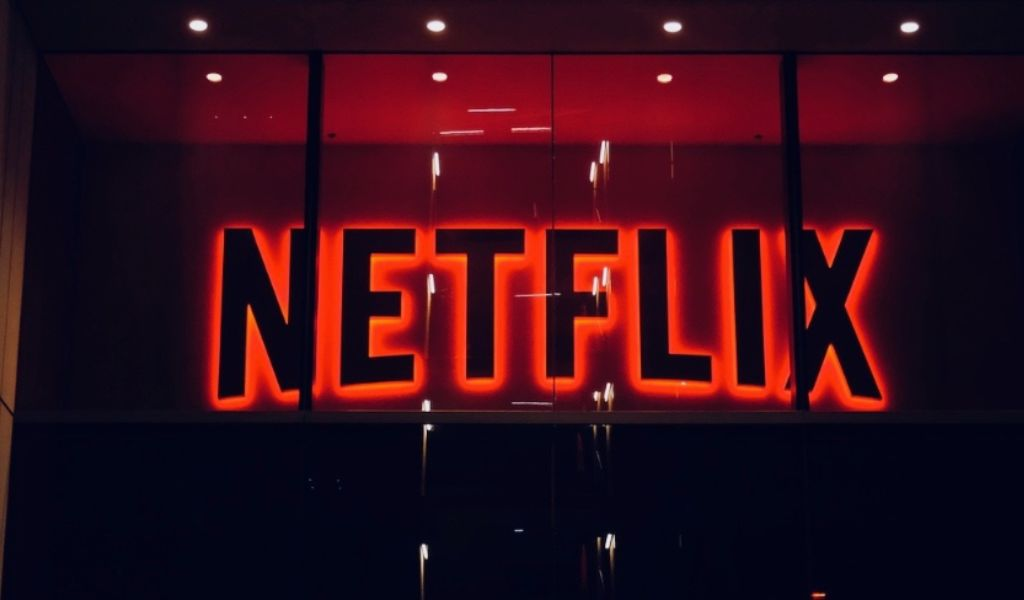

# **In this project, you are required to do**

1.   Exploratory Data Analysis
2.   Understanding what type content is available in different countries
1.   Is Netflix has increasingly focusing on TV rather than movies in recent years
2.   Built a Recommender Systems

# **Attribute Information**

1.   show_id : Unique ID for every Movie / Tv Show
2.   type : Identifier - A Movie or TV Show
1.   title : Title of the Movie / Tv Show
2.   director : Director of the Movie
1.   cast : Actors involved in the movie / show
2.   country : Country where the movie / show was produced
1.   date_added : Date it was added on Netflix
2.   release_year : Actual Releaseyear of the movie / show
1.   rating : TV Rating of the movie / show
2.   duration : Total Duration - in minutes or number of seasons
1.   listed_in : Genere
2.   description: The Summary description












In [2]:
# Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import nltk 
nltk.download('all',quiet=True)
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
# Loading the data
Netflix_df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING- shubham bhadouria/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

# **Dataset Overview**

In [75]:
#Checking number of rows and columns in our dataset.
print(f' The number of rows are {Netflix_df.shape[0]}')
print(f' The number of columns are {Netflix_df.shape[1]}')

 The number of rows are 7787
 The number of columns are 12


In [76]:
#Name of columns that we have in our dataset 
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [77]:
#view head of the dataset
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [78]:
#view tail of the dataset
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


# **Looking for Duplicates and Missing Values**

Last thing to check before moving on, is looking for duplicates and missing values in the dataset. We can use the is_null() function from Pandas to check for any missing data and then use the sum() function to see the total of missing values in each column.

In [79]:
# Checking for duplicate Values in the dataset
Netflix_df.duplicated().sum()

0

There are no duplicate values in our dataset.

In [80]:
#Checking the total null values in each feature
Netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are total 2389 missing values in director column, 718 missing values in cast column, 507 missing values in country column, 10 missing values in date_added column and 7 missing values in rating column.

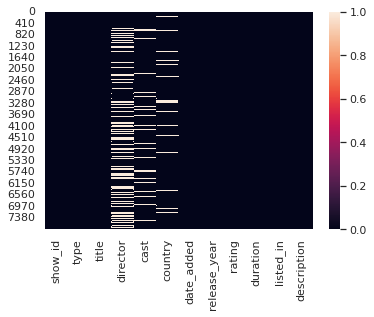

In [81]:
# Heat-map to show null values count
sns.heatmap(Netflix_df.isnull())

In [82]:
# Handling the missing values
Netflix_df['director'].fillna('Unknown',inplace = True)   # replacing null values by unknown
Netflix_df['cast'].fillna('Unknown',inplace = True)       # replacing null values by unknown
Netflix_df['country'].fillna('Unknown',inplace = True)    # replacing null values by unknown
Netflix_df['rating'].fillna(Netflix_df['rating'].mode()[0], inplace = True)       # # replacing null values by mode value
Netflix_df.dropna(axis=0, inplace = True)                 # dropping remaining null values from our dataframe

In [83]:
# Checking the null values after handling missing values
Netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now there are no missing values in our dataset.

# **Descriptive Analysis**
Generally, descriptive analyzes are the first manipulations performed in a quantitative study and their main objective is to summarize and explore the behavior of the data involved in the study.

In [84]:
# data information, It give us non-null values and data type of every column
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


No column has null values and each column is of object type except release_year which is int type.

In [85]:
 # data information in terms of various statistics values of all the features of or dataset
 Netflix_df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7777,7777,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7777,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7777,7777,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,7777,4050,Unknown,2379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7777,6822,Unknown,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7777,682,United States,2549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7777.0,NaN,NaN,NaN,2013.935965,8.760694,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7777,14,TV-MA,2868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7777,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Feature Creation**
Now, let us extract date_added column and create some useful new features from this date_added feature

In [86]:
Netflix_df["date_added"] = pd.to_datetime(Netflix_df['date_added']) 
Netflix_df['year_added'] = Netflix_df['date_added'].dt.year    ## It will contain the year on which the movie/show has been added
Netflix_df['month_added'] = Netflix_df['date_added'].dt.month   # It will contain the month number instead of characters with January=1, February=2,..and December=12

In [87]:
# Again checking the head of the dataset after creating new features
Netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
